# **Contours**

In image processing, contours refer to the curves or outlines that represent the boundaries of objects or regions within an image. Contours are a fundamental concept in computer vision and are widely used for tasks such as object detection, shape analysis, object recognition, and image segmentation.

Contours can be represented as a series of connected points or vertices that trace the boundary of an object in the image. Each contour consists of one or more curves, where each curve corresponds to a continuous segment of the object boundary. Contours can be either open or closed, depending on whether the contour forms a complete loop around the object.

The process of detecting contours in an image typically involves several steps:

1. **Image Preprocessing:**
   Before contour detection, the input image may undergo preprocessing steps such as noise reduction, image smoothing, and edge detection to enhance the quality of the image and highlight important features.

2. **Thresholding or Edge Detection:**
   In many cases, contours are detected based on changes in pixel intensity values. Common techniques for detecting contours include thresholding, which segments the image into regions based on intensity thresholds, and edge detection, which identifies abrupt changes in intensity values that often correspond to object boundaries.

3. **Contour Detection:**
   Once the image has been preprocessed and segmented, contour detection algorithms identify and extract the contours from the segmented image regions. These algorithms typically trace the boundary of each segmented region and represent it as a sequence of points or vertices.

4. **Contour Postprocessing:**
   After contour detection, postprocessing steps may be applied to refine and improve the quality of the detected contours. This may include smoothing the contours, removing small or spurious contours, and merging or splitting contours as needed.

5. **Contour Analysis:**
   Once the contours have been detected, they can be analyzed and processed to extract useful information about the objects in the image. This may include computing properties such as area, perimeter, centroid, bounding box, orientation, and convex hull of the objects represented by the contours.

Contours are a powerful tool in image processing and computer vision, providing a compact and informative representation of object boundaries in images. They enable the extraction of shape information, object localization, and recognition, making them essential for a wide range of applications in fields such as medical imaging, robotics, surveillance, and autonomous driving.

####**In this lesson we'll learn:**
1. Using findContours
2. Drawing Contours
3. Hierachy of Contours
4. Contouring Modes (Simple vs Approx) 

In [2]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

## **What are Contours?**
Contours are continous lines or curves that bound or cover the full boundary of an object.

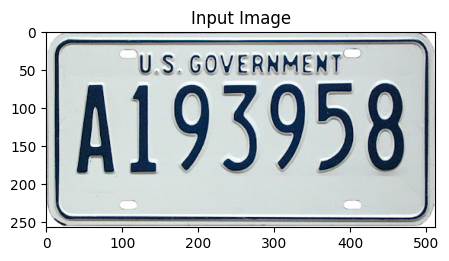

In [3]:
# Let's load a simple image license plate image
image = cv2.imread('image/car.jpg')
imshow('Input Image', image)

#### **Applying cv2.findContours()**

```cv2.findContours(image, Retrieval Mode, Approximation Method)```

**Retrieval Modes**
- **RETR_LIST** - Retrieves all the contours, but doesn't create any parent-child relationship. Parents and kids are equal under this rule, and they are just contours. ie they all belongs to same hierarchy level.
- **RETR_EXTERNAL** - Returns only extreme outer flags. All child contours are left behind.
- **RETR_CCOMP** - This flag retrieves all the contours and arranges them to a 2-level hierarchy. ie external contours of the object (ie its boundary) are placed in hierarchy-1. And the contours of holes inside object (if any) is placed in hierarchy-2. If any object inside it, its contour is placed again in hierarchy-1 only. And its hole in hierarchy-2 and so on.
- **RETR_TREE** -  It retrieves all the contours and creates a full family hierarchy list. 

**Approximation Method Options**
- cv2.CHAIN_APPROX_NONE – Stores all the points along the line(inefficient!)
- cv2.CHAIN_APPROX_SIMPLE – Stores the end points of each line




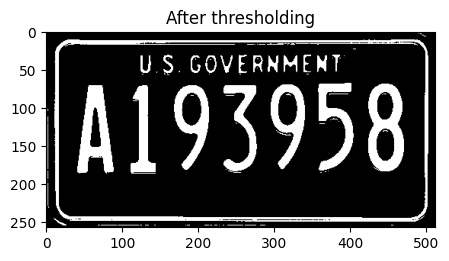

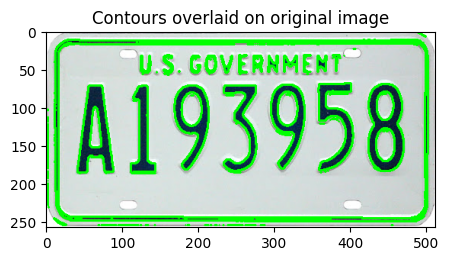

Number of Contours found = 139


In [5]:
image = cv2.imread('image/car.jpg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

# Finding Contours
# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))


In [6]:
contours[0]

array([[[453, 254]],

       [[454, 254]],

       [[455, 254]],

       [[454, 254]]], dtype=int32)

#### **What happens if we don't threshold? Bad things..**

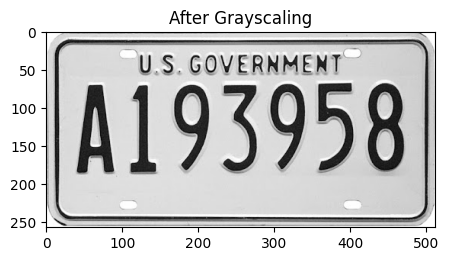

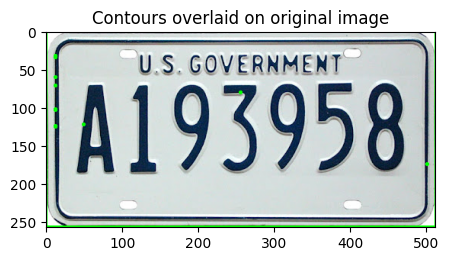

Number of Contours found = 10


In [7]:
image = cv2.imread('image/car.jpg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imshow('After Grayscaling', gray)

# Finding Contours
contours, hierarchy = cv2.findContours(gray, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))

# **NOTE: For findContours to work, the background has to be black and foreground (i.e. the text or objects)** 

#### Otherwise you'll need to invert the image by using **cv2..bitwise_not(input_image)**

#### **We can use Canny Edges instead of Thresholding**

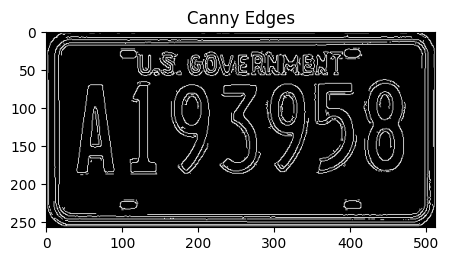

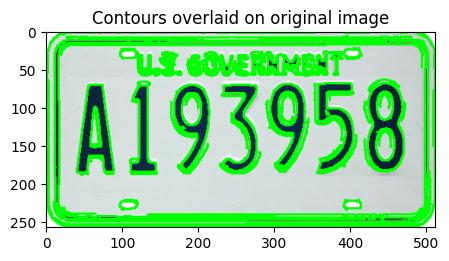

Number of Contours found = 159


In [8]:
image = cv2.imread('image/car.jpg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Canny Edges
edged = cv2.Canny(gray, 30, 200)
imshow('Canny Edges', edged)

# Finding Contours
contours, hierarchy = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))


## **Remember these Countouring Steps**

1. Grayscale
2. Threshold or Canny Edge Detection to Binarize image

**Note:** Blurring before Step 2 is recommended to remove noisy contours

# **Retreival Modes** 

Official Doc - https://docs.opencv.org/master/d9/d8b/tutorial_py_contours_hierarchy.html

**Hierachry**

This array stores 4 values for each contour:
- First term is the index of the Next contour
- Second term is the index of the Previous contour
- Third term is the index of the parent contour
- Forth term is the index of the child contour

### **RETR_LIST**
Retrieves all the contours, but doesn't create any parent-child relationship. Parents and kids are equal under this rule, and they are just contours. ie they all belongs to same hierarchy level.

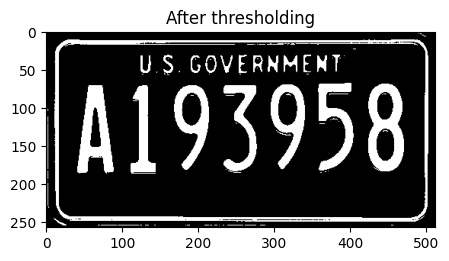

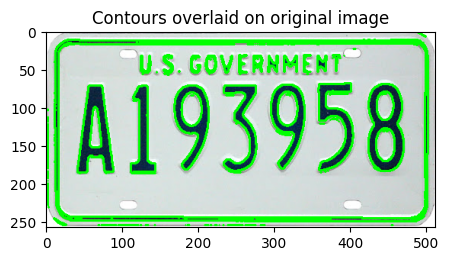

Number of Contours found = 139
[[[  1  -1  -1  -1]
  [  2   0  -1  -1]
  [  3   1  -1  -1]
  [  4   2  -1  -1]
  [  5   3  -1  -1]
  [  6   4  -1  -1]
  [  7   5  -1  -1]
  [  8   6  -1  -1]
  [  9   7  -1  -1]
  [ 10   8  -1  -1]
  [ 11   9  -1  -1]
  [ 12  10  -1  -1]
  [ 13  11  -1  -1]
  [ 14  12  -1  -1]
  [ 15  13  -1  -1]
  [ 16  14  -1  -1]
  [ 17  15  -1  -1]
  [ 18  16  -1  -1]
  [ 19  17  -1  -1]
  [ 20  18  -1  -1]
  [ 21  19  -1  -1]
  [ 22  20  -1  -1]
  [ 23  21  -1  -1]
  [ 24  22  -1  -1]
  [ 25  23  -1  -1]
  [ 26  24  -1  -1]
  [ 27  25  -1  -1]
  [ 28  26  -1  -1]
  [ 29  27  -1  -1]
  [ 30  28  -1  -1]
  [ 31  29  -1  -1]
  [ 32  30  -1  -1]
  [ 33  31  -1  -1]
  [ 34  32  -1  -1]
  [ 35  33  -1  -1]
  [ 36  34  -1  -1]
  [ 37  35  -1  -1]
  [ 38  36  -1  -1]
  [ 39  37  -1  -1]
  [ 40  38  -1  -1]
  [ 41  39  -1  -1]
  [ 42  40  -1  -1]
  [ 43  41  -1  -1]
  [ 44  42  -1  -1]
  [ 45  43  -1  -1]
  [ 46  44  -1  -1]
  [ 47  45  -1  -1]
  [ 48  46  -1  -1]
  [ 49  4

In [9]:
image = cv2.imread('image/car.jpg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))
print(hierarchy)

### **RETR_EXTERNAL**

Returns only extreme outer flags. All child contours are left behind.

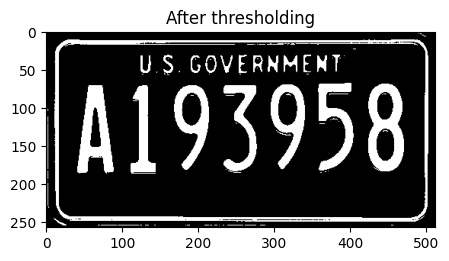

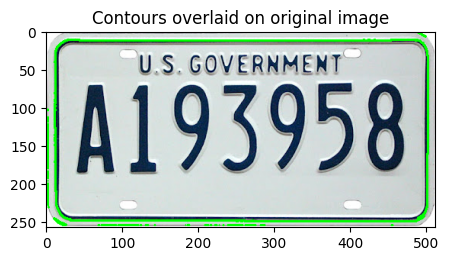

Number of Contours found = 27
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [ 8  6 -1 -1]
  [ 9  7 -1 -1]
  [10  8 -1 -1]
  [11  9 -1 -1]
  [12 10 -1 -1]
  [13 11 -1 -1]
  [14 12 -1 -1]
  [15 13 -1 -1]
  [16 14 -1 -1]
  [17 15 -1 -1]
  [18 16 -1 -1]
  [19 17 -1 -1]
  [20 18 -1 -1]
  [21 19 -1 -1]
  [22 20 -1 -1]
  [23 21 -1 -1]
  [24 22 -1 -1]
  [25 23 -1 -1]
  [26 24 -1 -1]
  [-1 25 -1 -1]]]


In [10]:
image = cv2.imread('image/car.jpg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image, size = 10)

print("Number of Contours found = " + str(len(contours)))
print(hierarchy)

### **RETR_CCOMP**

Retrieves all the contours and arranges them to a 2-level hierarchy. ie external contours of the object (ie its boundary) are placed in hierarchy-1. And the contours of holes inside object (if any) is placed in hierarchy-2. If any object inside it, its contour is placed again in hierarchy-1 only. And its hole in hierarchy-2 and so on.

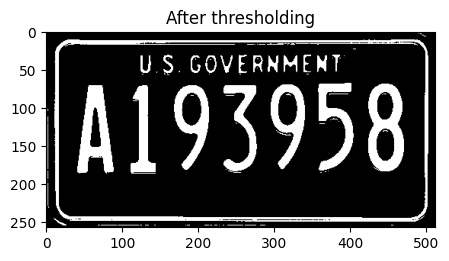

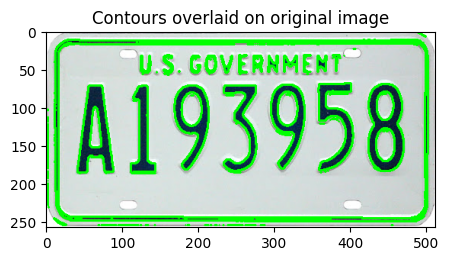

Number of Contours found = 139
[[[  1  -1  -1  -1]
  [  2   0  -1  -1]
  [  3   1  -1  -1]
  [  4   2  -1  -1]
  [  5   3  -1  -1]
  [  6   4  -1  -1]
  [  7   5  -1  -1]
  [  8   6  -1  -1]
  [  9   7  -1  -1]
  [ 10   8  -1  -1]
  [ 11   9  -1  -1]
  [ 12  10  -1  -1]
  [ 13  11  -1  -1]
  [ 14  12  -1  -1]
  [ 15  13  -1  -1]
  [ 16  14  -1  -1]
  [ 17  15  -1  -1]
  [ 18  16  -1  -1]
  [ 19  17  -1  -1]
  [ 20  18  -1  -1]
  [ 21  19  -1  -1]
  [ 22  20  -1  -1]
  [ 23  21  -1  -1]
  [ 24  22  -1  -1]
  [ 25  23  -1  -1]
  [ 26  24  -1  -1]
  [ 27  25  -1  -1]
  [ 28  26  -1  -1]
  [ 29  27  -1  -1]
  [ 30  28  -1  -1]
  [ 31  29  -1  -1]
  [ 32  30  -1  -1]
  [ 33  31  -1  -1]
  [ 34  32  -1  -1]
  [ 35  33  -1  -1]
  [ 36  34  -1  -1]
  [ 37  35  -1  -1]
  [ 38  36  -1  -1]
  [ 39  37  -1  -1]
  [ 40  38  -1  -1]
  [ 41  39  -1  -1]
  [ 42  40  -1  -1]
  [ 43  41  -1  -1]
  [ 44  42  -1  -1]
  [ 46  43  45  -1]
  [ -1  -1  -1  44]
  [ 48  44  47  -1]
  [ -1  -1  -1  46]
  [ 49  4

In [11]:
image = cv2.imread('image/car.jpg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))
print(hierarchy)

### **RETR_TREE**
It retrieves all the contours and creates a full family hierarchy list.

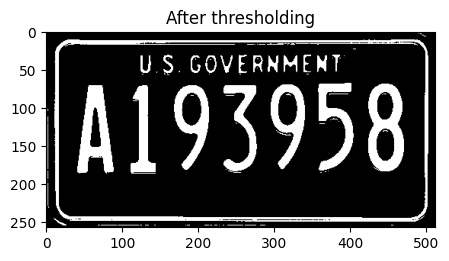

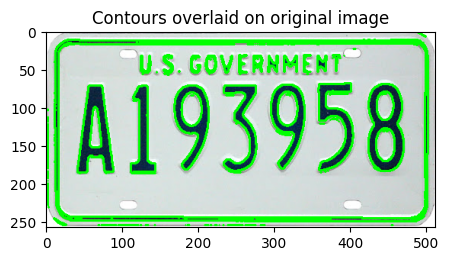

Number of Contours found = 139
[[[  1  -1  -1  -1]
  [  2   0  -1  -1]
  [  3   1  -1  -1]
  [  4   2  -1  -1]
  [  5   3  -1  -1]
  [  6   4  -1  -1]
  [  7   5  -1  -1]
  [  8   6  -1  -1]
  [  9   7  -1  -1]
  [ 10   8  -1  -1]
  [ 11   9  -1  -1]
  [ 12  10  -1  -1]
  [ 13  11  -1  -1]
  [ 14  12  -1  -1]
  [ 15  13  -1  -1]
  [ 16  14  -1  -1]
  [ 17  15  -1  -1]
  [ 18  16  -1  -1]
  [ 19  17  -1  -1]
  [ 20  18  -1  -1]
  [ 21  19  -1  -1]
  [ 22  20  -1  -1]
  [ 23  21  -1  -1]
  [ 24  22  -1  -1]
  [ 25  23  -1  -1]
  [138  24  26  -1]
  [ 27  -1  -1  25]
  [ 28  26  -1  25]
  [ 29  27  -1  25]
  [ 30  28  -1  25]
  [ 31  29  -1  25]
  [ 32  30  -1  25]
  [ 33  31  -1  25]
  [ 34  32  -1  25]
  [ 35  33  -1  25]
  [ 36  34  -1  25]
  [ 37  35  -1  25]
  [ 38  36  -1  25]
  [ 39  37  -1  25]
  [ 40  38  -1  25]
  [ 41  39  -1  25]
  [ 42  40  -1  25]
  [ 43  41  -1  25]
  [ 44  42  -1  25]
  [ 45  43  -1  25]
  [ 46  44  -1  25]
  [ 47  45  -1  25]
  [ 48  46  -1  25]
  [ 49  4

In [12]:
image = cv2.imread('image/car.jpg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))
print(hierarchy)

## **Contouring Modes**

#### **CHAIN_APPROX_NONE**

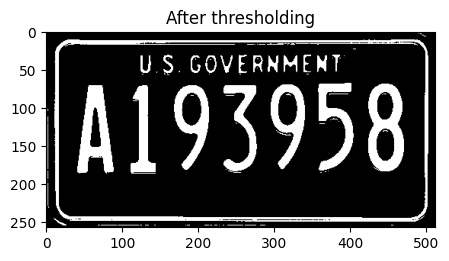

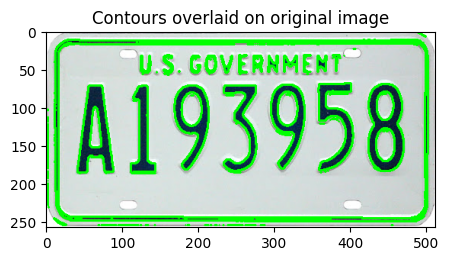

Number of Contours found = 139
4
12
28
40
2
1
6
4
10
6
1
2
8
4
54
40
4
33
2
58
1
20
118
14
4
1419
4
6
6
4
14
14
32
10
18
88
62
18
4
4
4
4
10
4
6
6
4
10
4
6
10
4
10
4
12
4
24
20
14
1765
2
18
2
1
1
38
12
2
1
1
14
10
20
49
341
8
257
103
6
343
326
4
4
116
255
105
11
271
4
6
100
12
88
1
6
375
4
4
2
1
2
3
2
3
1
2
1
2
1
1
75
96
83
70
27
2
79
55
45
2
85
97
53
75
79
81
6
16
1
1
16
32
10
5
4
43
6
15
20


In [13]:
image = cv2.imread('image/car.jpg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))
for c in contours:
  print(len(c))


#### **CHAIN_APPROX_SIMPLE**

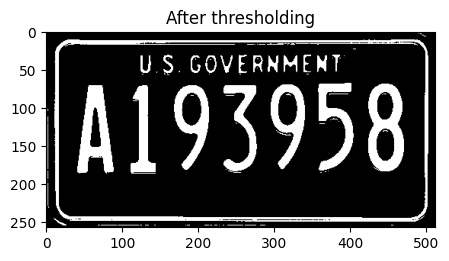

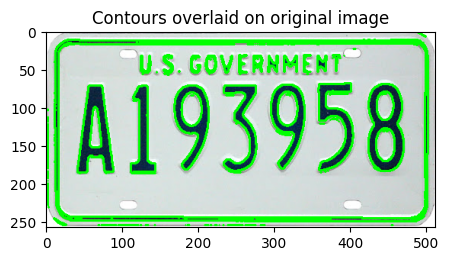

Number of Contours found = 139
2
2
2
2
2
1
2
2
2
2
1
2
2
2
2
2
2
24
2
2
1
2
2
2
2
144
4
6
6
4
6
6
6
6
6
6
6
6
4
4
4
4
6
4
6
6
4
6
4
6
6
4
6
4
6
4
6
6
7
132
2
2
2
1
1
21
2
2
1
1
7
2
2
4
145
6
133
55
2
46
95
4
4
29
128
48
8
128
4
6
38
8
42
1
2
135
2
2
2
1
2
3
2
3
1
2
1
2
1
1
24
30
32
24
13
2
50
28
28
2
40
23
11
18
30
47
2
2
1
1
2
2
4
4
2
9
6
11
16


In [14]:
image = cv2.imread('image/car.jpg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))
for c in contours:
  print(len(c))